Mean Squared Error: 2900.19
R^2 Score: 0.45


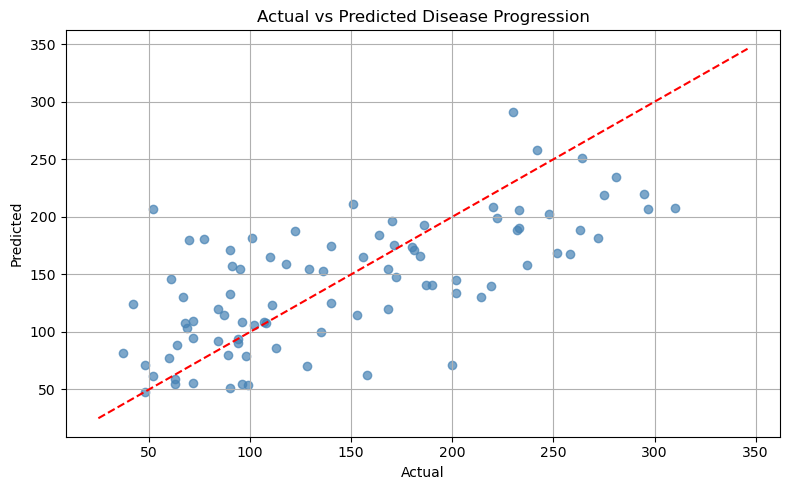

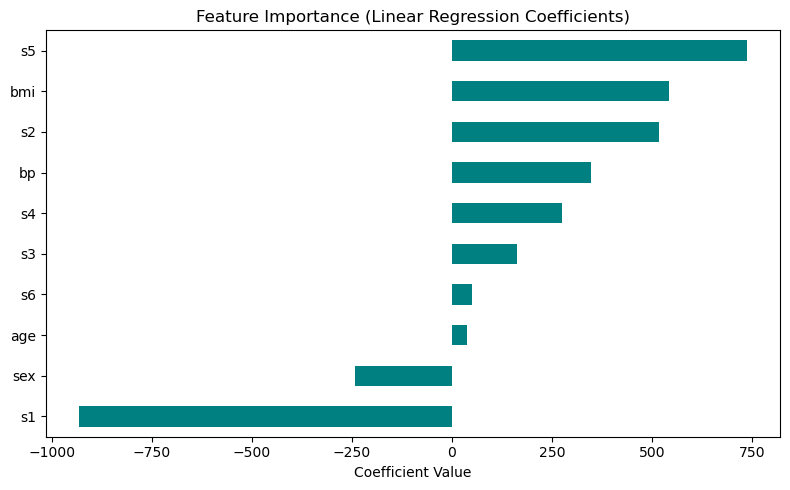

In [2]:
# diabetes_prediction_pipeline.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='disease_progression')

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R^2 Score:", round(r2, 2))

# 6. Visualize predictions vs actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="steelblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Disease Progression")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Visualize feature coefficients
coefficients = pd.Series(model.coef_, index=diabetes.feature_names)
plt.figure(figsize=(8, 5))
coefficients.sort_values().plot(kind='barh', color="teal")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()
